In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#import graphviz  
from sklearn import tree
#import pydot
from sklearn.tree import export_graphviz
#import pydotplus
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator


In [10]:
df = pd.read_csv('Telco-Customer-Churn Dataset.csv')

In [11]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [14]:
produce_missing_report(df)

,column_name,percent_missing
customerID,customerID,0.0
gender,gender,0.0
SeniorCitizen,SeniorCitizen,0.0
Partner,Partner,0.0
Dependents,Dependents,0.0
tenure,tenure,0.0
PhoneService,PhoneService,0.0
MultipleLines,MultipleLines,0.0
InternetService,InternetService,0.0
OnlineSecurity,OnlineSecurity,0.0


In [15]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
to_drop = ['customerID', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df = df.drop(to_drop, axis=1)

In [18]:
df.dtypes

gender              object
SeniorCitizen        int64
Partner             object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
Contract            object
PaymentMethod       object
MonthlyCharges     float64
TotalCharges        object
Churn               object
dtype: object

In [19]:
le = LabelEncoder()

Gender: Male-0, Female-1

In [20]:
df['gender'] = le.fit_transform(df['gender'])

PhoneService: Yes-1, No-0

In [21]:
df['PhoneService'] = le.fit_transform(df['PhoneService'])

MultipleLines: No-0, No PhoneService-1, Yes-2

In [22]:
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])

InternetService: DSL-0, Fiber Optic-1, No-2

In [23]:
df['InternetService'] = le.fit_transform(df['InternetService'])

Partner: Yes-1, No-0

In [24]:
df['Partner'] = le.fit_transform(df['Partner'])

Contract: Month to Month-0, 1 Year-1, 2 Years-2

In [25]:
df['Contract'] = le.fit_transform(df['Contract'])

PaymentMethod: Bank Transfer-0, Credit Card-1, Electronic Check-2, Mailed Check-3

In [26]:
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

Churn: No-0, Yes-1

In [27]:
df['Churn'] = le.fit_transform(df['Churn'])

In [28]:
df.dtypes

gender               int32
SeniorCitizen        int64
Partner              int32
tenure               int64
PhoneService         int32
MultipleLines        int32
InternetService      int32
Contract             int32
PaymentMethod        int32
MonthlyCharges     float64
TotalCharges        object
Churn                int32
dtype: object

TotalCharges had empty sets so the conversion to a float was did as followed, where we used the mean of the values to be substitued into the empty sets and then the datatype was changed to float.

In [29]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [30]:
print((df['TotalCharges'] == ' ').sum())

0


In [31]:
mean_value = df['TotalCharges'].astype(float).mean()
df['TotalCharges'] = df['TotalCharges'].replace(' ', mean_value).astype(float)

In [32]:
median_value = df['TotalCharges'].astype(float).median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_value).astype(float)

In [33]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Beautification/Labelling of dataset.

In [34]:
df.rename(columns={"tenure": "Tenure (Months)"}, inplace=True)
df.rename(columns={"gender": "Gender (Female-0, Male-1)"}, inplace=True)
df.rename(columns={"SeniorCitizen": "SeniorCitizen (No-0, Yes-1)"}, inplace=True)
df.rename(columns={"PhoneService": "PhoneService (No-0, Yes-1)"}, inplace=True)
df.rename(columns={"Partner": "Partner (No-0, Yes-1)"}, inplace=True)
df.rename(columns={"MultipleLines": "MultipleLines (No-0, No PhoneService-1, Yes-1)"}, inplace=True)
df.rename(columns={"InternetService": "InternetService (DSL-0, FO-1, NO-2)"}, inplace=True)
df.rename(columns={"Contract": "Contract (M to M-0, 1 Year-1, 2 Years-2)"}, inplace=True)
df.rename(columns={"PaymentMethod": "PaymentMethod(BT-0, CC-1, EC-2, MC-3)"}, inplace=True)
df.rename(columns={"Churn": "Churn (No-0, Yes-1)"}, inplace=True)


In [35]:
df.head(10)

,"Gender (Female-0, Male-1)","SeniorCitizen (No-0, Yes-1)","Partner (No-0, Yes-1)",Tenure (Months),"PhoneService (No-0, Yes-1)","MultipleLines (No-0, No PhoneService-1, Yes-1)","InternetService (DSL-0, FO-1, NO-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
0,0,0,1,1,0,1,0,0,2,29.85,29.85,0
1,1,0,0,34,1,0,0,1,3,56.95,1889.50,0
2,1,0,0,2,1,0,0,0,3,53.85,108.15,1
3,1,0,0,45,0,1,0,1,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,2,70.70,151.65,1
5,0,0,0,8,1,2,1,0,2,99.65,820.50,1
6,1,0,0,22,1,2,1,0,1,89.10,1949.40,0
7,0,0,0,10,0,1,0,0,3,29.75,301.90,0
8,0,0,1,28,1,2,1,0,2,104.80,3046.05,1
9,1,0,0,62,1,0,0,1,0,56.15,3487.95,0


In [36]:
model = BayesianModel([('Gender (Female-0, Male-1)', 'SeniorCitizen (No-0, Yes-1)'), ('Partner (No-0, Yes-1)', 'SeniorCitizen (No-0, Yes-1)'), ('Tenure (Months)', 'SeniorCitizen (No-0, Yes-1)'), ('PhoneService (No-0, Yes-1)', 'MultipleLines (No-0, No PhoneService-1, Yes-1)'), ('PhoneService (No-0, Yes-1)', 'TotalCharges'), ('MultipleLines (No-0, No PhoneService-1, Yes-1)', 'InternetService (DSL-0, FO-1, NO-2)'), ('MultipleLines (No-0, No PhoneService-1, Yes-1)', 'MonthlyCharges'), ('InternetService (DSL-0, FO-1, NO-2)', 'TotalCharges'), ('Contract (M to M-0, 1 Year-1, 2 Years-2)', 'TotalCharges'), ('PaymentMethod(BT-0, CC-1, EC-2, MC-3)', 'TotalCharges'), ('SeniorCitizen (No-0, Yes-1)', 'Churn (No-0, Yes-1)'), ('TotalCharges', 'Churn (No-0, Yes-1)')])

# fit the parameters of the model using Maximum Likelihood Estimation (MLE)
model.fit(df, estimator=MaximumLikelihoodEstimator)

# estimate the Bayesian network parameters using Bayesian Estimation
model.fit(df, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

# print the network structure and the learned parameters
print(model.get_cpds())

c:\Users\user\anaconda3\envs\joshua_env\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


[<TabularCPD representing P(Gender (Female-0, Male-1):2) at 0x17255a3ad40>, <TabularCPD representing P(SeniorCitizen (No-0, Yes-1):2 | Gender (Female-0, Male-1):2, Partner (No-0, Yes-1):2, Tenure (Months):73) at 0x17256bc2230>, <TabularCPD representing P(Partner (No-0, Yes-1):2) at 0x17256bc1f60>, <TabularCPD representing P(Tenure (Months):73) at 0x17256bc01c0>, <TabularCPD representing P(PhoneService (No-0, Yes-1):2) at 0x17255a3b5b0>, <TabularCPD representing P(MultipleLines (No-0, No PhoneService-1, Yes-1):3 | PhoneService (No-0, Yes-1):2) at 0x17255a392d0>, <TabularCPD representing P(TotalCharges:6531 | Contract (M to M-0, 1 Year-1, 2 Years-2):3, InternetService (DSL-0, FO-1, NO-2):3, PaymentMethod(BT-0, CC-1, EC-2, MC-3):4, PhoneService (No-0, Yes-1):2) at 0x17256bc3790>, <TabularCPD representing P(InternetService (DSL-0, FO-1, NO-2):3 | MultipleLines (No-0, No PhoneService-1, Yes-1):3) at 0x17256bc2680>, <TabularCPD representing P(MonthlyCharges:1585 | MultipleLines (No-0, No Pho

Plot the probability distribution of the target variable (churn) using the posterior probabilities obtained from the Bayesian network.

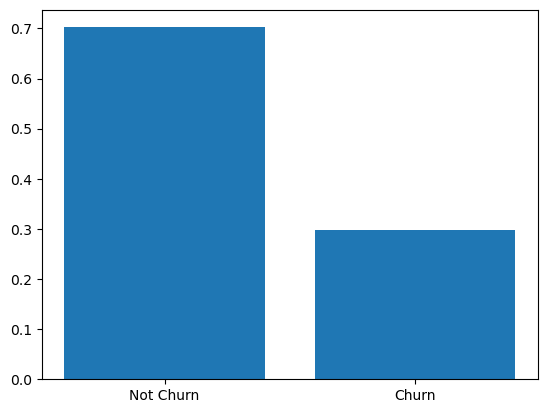

In [42]:
# import the VariableElimination class
from pgmpy.inference import VariableElimination

# create a variable elimination object for the model
infer = VariableElimination(model)

# get the posterior probabilities for churn
posterior_churn = infer.query(variables=['Churn (No-0, Yes-1)'], evidence=None)
    
# extract the probability of churn being true and false
p_churn = posterior_churn.values[1]
p_not_churn = posterior_churn.values[0]

# plot the probability distribution
plt.bar([0, 1], [p_not_churn, p_churn], tick_label=["Not Churn", "Churn"])
plt.show()


Posterior probability refers to the probability of an event or hypothesis after taking into account new information or evidence. In the context of Bayesian inference, it is the updated probability of a hypothesis after incorporating new evidence using Bayes' theorem. In other words, it is the probability of a hypothesis given the observed data.

In the case of predicting churn in a telecommunications company, the posterior probability of churn is the updated probability of a customer churning given their observed characteristics and behavior (e.g., tenure, monthly charges, payment method, etc.). This probability is obtained by combining prior beliefs (prior probability) about churn with the likelihood of the observed data given the hypothesis (likelihood function). The resulting probability is then normalized to sum up to 1.

RANDOM FOREST

In [ ]:
# separate the features (X) from the target variable (y)
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y = df['Churn (No-0, Yes-1)']

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the data
rf.fit(X, y)

# get the feature importances
importances = rf.feature_importances_

# sort the feature importances in descending order
indices = importances.argsort()[::-1]

# plot the feature importances as a bar chart
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

In [ ]:
# Define the features and target
features = df.columns[:-1]
target = 'Churn (No-0, Yes-1)'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Export the graph
tree = clf.estimators_[0]
export_graphviz(tree, out_file='tree.dot', feature_names=features, class_names=target, rounded=True, precision=1)

# Convert the dot file to a png image
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')